In [1]:
import yfinance as yf
import pandas as pd

btc = yf.download('BTC-USD', start='2017-01-01', end='2025-03-01')

print("\nBTC Closing Price Summary:")
print(btc['Close'].describe())
print("\n")

# btc = Pandas DataFrame [table with Rows (each row is one day) and Columns (Open, High, Low, Close, Volume)]
print(btc.head())

# BTC-USD data columns:
# - Open: Price at the market open that day
# - High: Highest price during the day
# - Low: Lowest price during the day
# - Close: Price at market close
# - Volume: Trading volume in USD

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


BTC Closing Price Summary:
Ticker        BTC-USD
count     2981.000000
mean     26516.301237
std      24239.459142
min        777.757019
25%       7463.105957
50%      18547.400391
75%      41626.195312
max     106146.265625


Price             Close         High          Low         Open     Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD    BTC-USD
Date                                                                     
2017-01-01   998.325012  1003.080017   958.698975   963.658020  147775008
2017-01-02  1021.750000  1031.390015   996.702026   998.617004  222184992
2017-01-03  1043.839966  1044.079956  1021.599976  1021.599976  185168000
2017-01-04  1154.729980  1159.420044  1044.400024  1044.400024  344945984
2017-01-05  1013.380005  1191.099976   910.416992  1156.729980  510199008


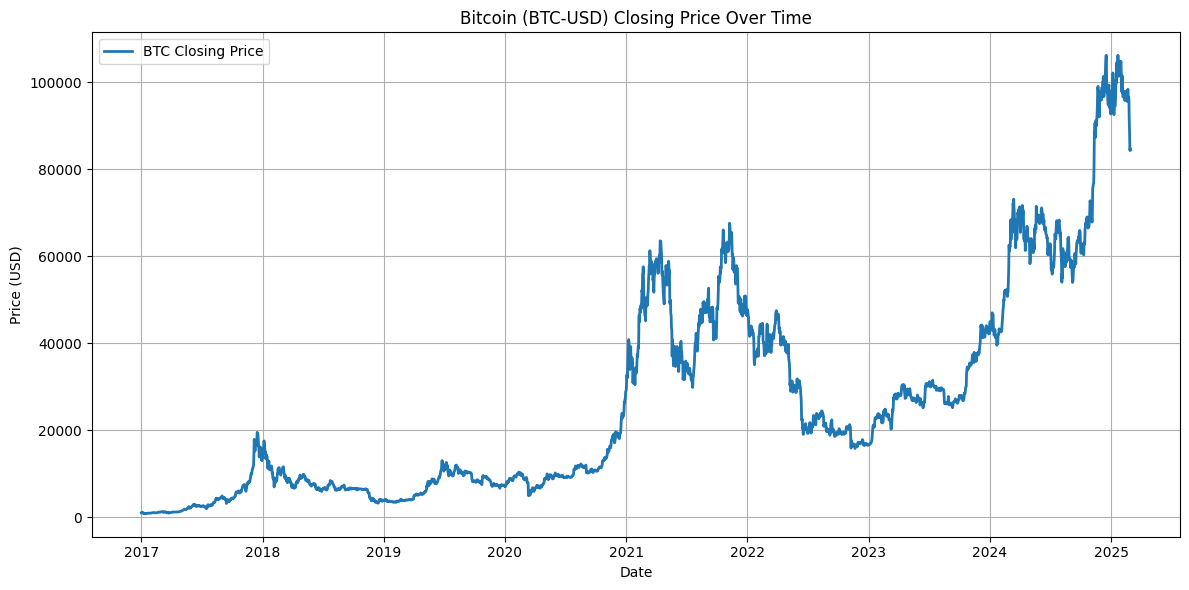

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# plt.plot(X_values (dates), Y_values (closing times), optional_parameters (label, linewidth))
plt.plot(btc.index, btc['Close'], label='BTC Closing Price', linewidth=2)

plt.title('Bitcoin (BTC-USD) Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.grid(True)
plt.legend() # Show the label in the plot
plt.tight_layout()

plt.savefig('images/btc_closing_price_over_time.png')
plt.show()

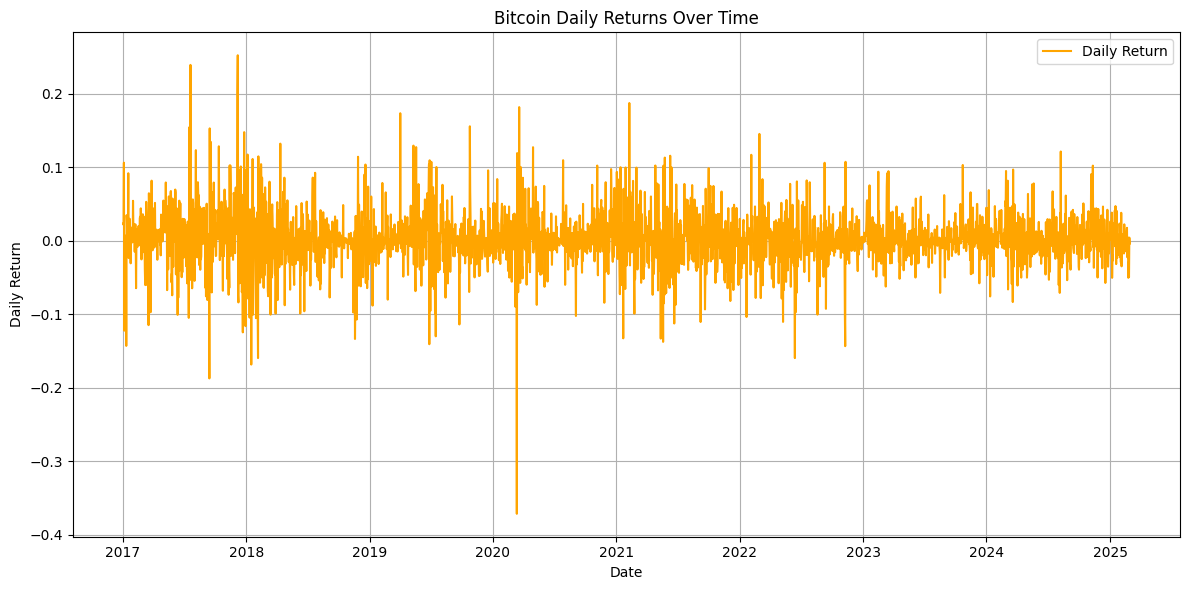

In [3]:
# Calculate daily returns - Calculated daily returns to analyse price changes and volatility over time.
btc['Daily Return'] = btc['Close'].pct_change() # Create new column in 'btc' DataFrame called 'Daily Return'

# .pct_change() = percentage change. Daily Return = (Today’s Price - Yesterday’s Price) / Yesterday’s Price

plt.figure(figsize=(12, 6))
plt.plot(btc.index, btc['Daily Return'], label='Daily Return', color='orange')
plt.title('Bitcoin Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig('images/btc_daily_returns_over_time.png')
plt.show()

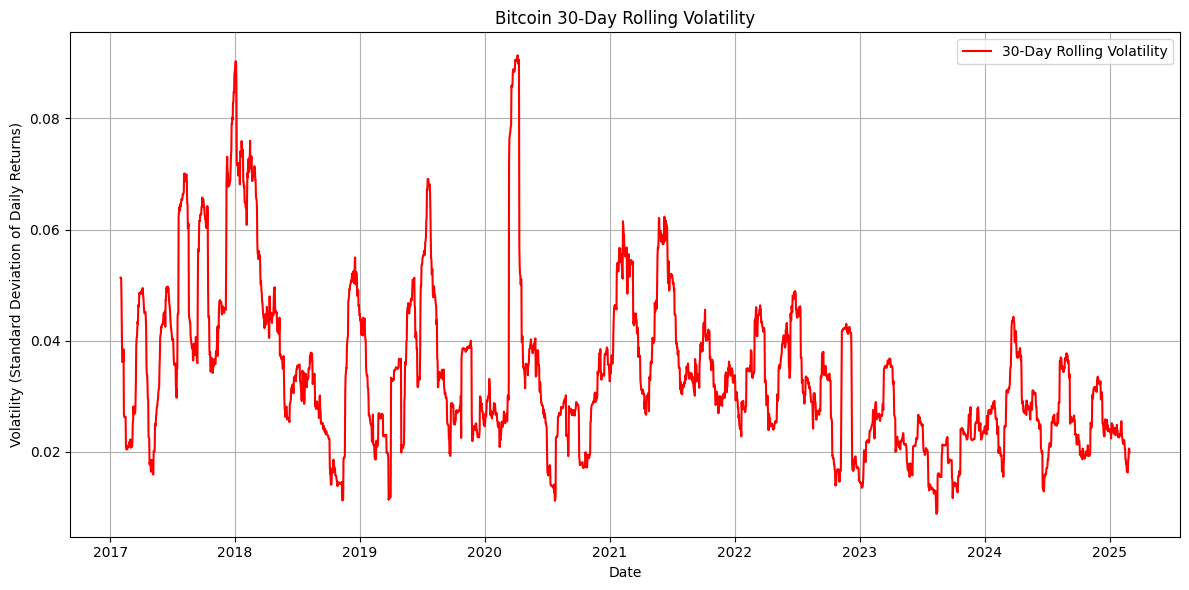

In [4]:
# Rolling Volatility Calculation

# Calculate 30-day rolling standard deviation of daily returns (i.e. rolling volatility)
# This gives a moving window of risk — we look at each 30-day slice and see how "wild" the price has been
btc['Rolling Volatility (30D)'] = btc['Daily Return'].rolling(window=30).std()


# Plotting
plt.figure(figsize=(12, 6))
plt.plot(btc.index, btc['Rolling Volatility (30D)'], label='30-Day Rolling Volatility', color='red')
plt.title('Bitcoin 30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation of Daily Returns)')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig('images/btc_volatility_30d.png')
plt.show()

In [5]:
# Clean MultiIndex column names (flatten to single level)
btc.columns = [col[0] if isinstance(col, tuple) else col for col in btc.columns]

In [6]:
volatility_sorted = btc.dropna(subset=['Rolling Volatility (30D)'])
top_volatility = volatility_sorted.sort_values(by='Rolling Volatility (30D)', ascending=False).head(5)

print("\nTop 5 Most Volatile Periods (30-Day Rolling):")
print(top_volatility[['Rolling Volatility (30D)', 'Close']])


Top 5 Most Volatile Periods (30-Day Rolling):
            Rolling Volatility (30D)        Close
Date                                             
2020-04-06                  0.091330  7271.781250
2020-04-03                  0.090578  6733.387207
2020-04-02                  0.090573  6793.624512
2020-04-10                  0.090525  6865.493164
2020-03-31                  0.090507  6438.644531


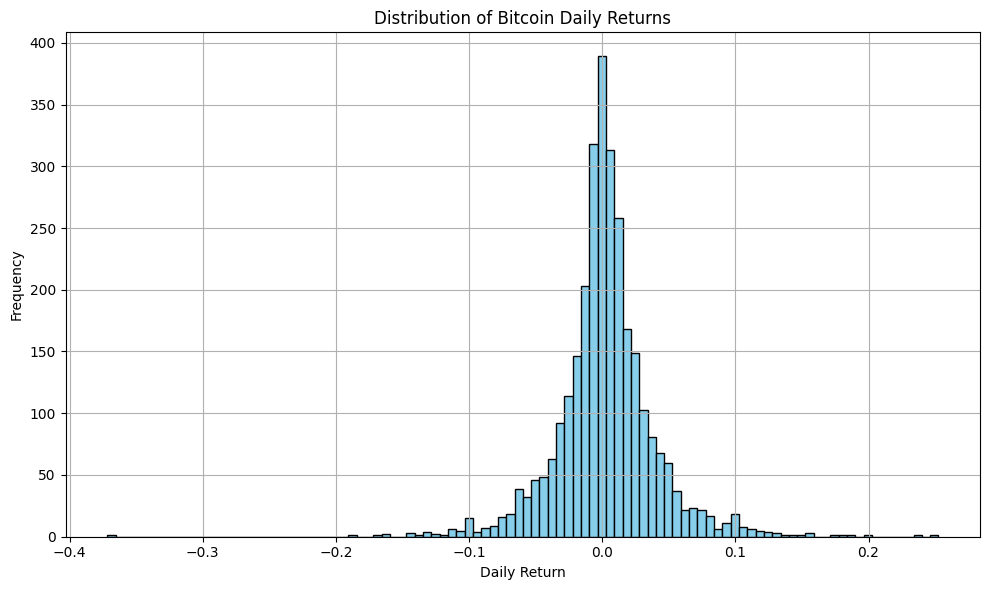

In [7]:
# Daily Return Distribution

plt.figure(figsize=(10, 6))

# Plot histogram of daily returns
plt.hist(btc['Daily Return'].dropna(), bins=100, color='skyblue', edgecolor='black')

plt.title('Distribution of Bitcoin Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

plt.savefig('images/btc_daily_return_distribution.png')
plt.show()

In [8]:
# ML: Feature Engineering

# Binary target: was the NEXT day's return positive?
btc['Target'] = (btc['Daily Return'].shift(-1) > 0).astype(int)

# Create lagged return (previous day's return)
btc['Lagged Return (1D)'] = btc['Daily Return'].shift(1)

# Create rolling mean and rolling std (volatility) of last 5 days
btc['Rolling Mean (5D)'] = btc['Daily Return'].rolling(window=5).mean()
btc['Rolling Std (5D)'] = btc['Daily Return'].rolling(window=5).std()

# Drop rows with missing values due to shifts/rolling
btc_ml = btc.dropna(subset=['Lagged Return (1D)', 'Rolling Mean (5D)', 'Rolling Std (5D)', 'Target'])

print(btc_ml.head())

                 Close         High         Low         Open     Volume  \
Date                                                                      
2017-01-06  902.200989  1046.810059  883.943970  1014.239990  351876000   
2017-01-07  908.585022   908.585022  823.556030   903.487000  279550016   
2017-01-08  911.198975   942.723999  887.249023   908.174988  158715008   
2017-01-09  902.828003   913.685974  879.807007   913.244019  141876992   
2017-01-10  907.679016   914.872986  901.059998   902.440002  115808000   

            Daily Return  Rolling Volatility (30D)  Target  \
Date                                                         
2017-01-06     -0.109711                       NaN       1   
2017-01-07      0.007076                       NaN       1   
2017-01-08      0.002877                       NaN       0   
2017-01-09     -0.009187                       NaN       1   
2017-01-10      0.005373                       NaN       0   

            Lagged Return (1D)  Rolling

In [ ]:
# ML: Train/Test Split and Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Features and target variable
features = ['Lagged Return (1D)', 'Rolling Mean (5D)', 'Rolling Std (5D)']

x = btc_ml[features] # the input features (A table with all the info needed for model to use to make predictions)
y = btc_ml['Target'] # the target (Target column -> 1 if BTC goes up tomorrow, 0 otherwise)

""" Real World Example:
X = A person's job history, skills, and portfolio

y = Whether they got hired or not
-. The model learns: “What kind of profiles usually get hired?”
"""


# 2. Split data into training and testing (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
# print("Train/Test Split:")
# print( "\n", x_train.head(), x_test.head(), "\n")
# print( "\n", y_train.head(), y_test.head(), "\n")

# 3. Create and train logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)


# 4. Make predictions on test set
y_pred = model.predict(x_test)

print("\n")
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.5067114093959731


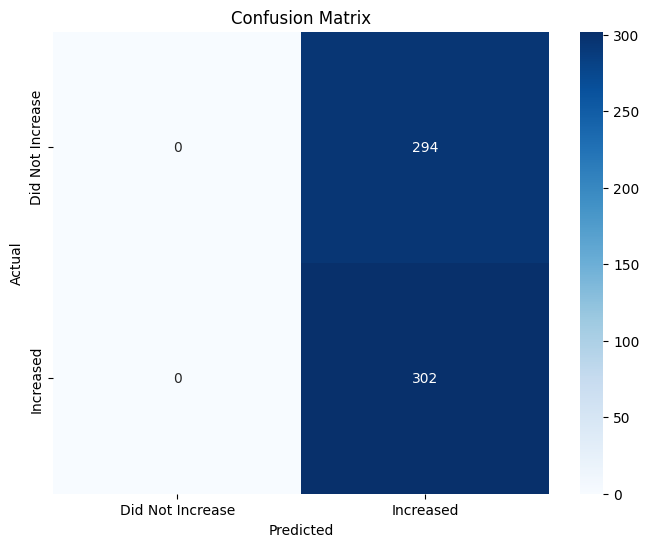

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Increase', 'Increased'],
            yticklabels=['Did Not Increase', 'Increased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('images/confusion_matrix_initial.png')
plt.show()

In [24]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['Did Not Increase', 'Increased'])

with open('reports/classification_report_initial.txt', 'w') as f:
    f.write(report)

print(report)

                  precision    recall  f1-score   support

Did Not Increase       0.00      0.00      0.00       294
       Increased       0.51      1.00      0.67       302

        accuracy                           0.51       596
       macro avg       0.25      0.50      0.34       596
    weighted avg       0.26      0.51      0.34       596



c:\Users\janid\OneDrive\Documents\Personal\Crypto Trend Analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janid\OneDrive\Documents\Personal\Crypto Trend Analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janid\OneDrive\Documents\Personal\Crypto Trend Analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [25]:
from imblearn.over_sampling import SMOTE

# Synthetic Minority Over-sampling Technique - balance out an imbalanced dataset for classification problems.
smote = SMOTE(random_state=69) #  Creating an instance of the SMOTE class with FIXED random behaviour for reproducibility (so it always generates the same synthetic samples)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train) # take the training data (x_train and y_train), and give a balanced version.
# .fit_resample():
# fit -> looks at the structure of the data
# resample -> actually creates new fake rows to balance the classes

# Show new class counts
print("Class distribution after SMOTE:")
print(y_train_balanced.value_counts())

Class distribution after SMOTE:
Target
1    1258
0    1258
Name: count, dtype: int64


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train on new balanced data
model_balanced = LogisticRegression()
model_balanced.fit(x_train_balanced, y_train_balanced)

# Make predictions on the original test set (x_test — untouched!)
y_pred_balanced = model_balanced.predict(x_test)


print("Accuracy (Balanced):", accuracy_score(y_test, y_pred_balanced))
print("\n Classification Report (Balanced):\n")
print(classification_report(y_test, y_pred_balanced, target_names=['Did Not Increase', 'Increased']))

Accuracy (Balanced): 0.5067114093959731

 Classification Report (Balanced):

                  precision    recall  f1-score   support

Did Not Increase       0.50      0.58      0.54       294
       Increased       0.52      0.44      0.47       302

        accuracy                           0.51       596
       macro avg       0.51      0.51      0.50       596
    weighted avg       0.51      0.51      0.50       596



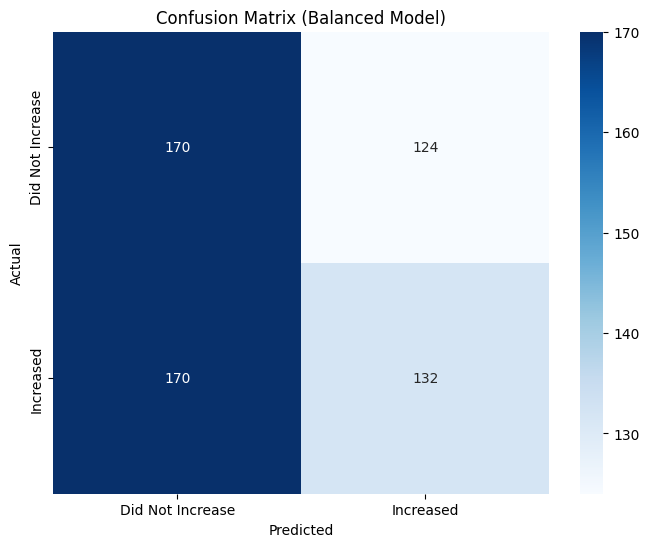

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Balanced Model
cm_balanced = confusion_matrix(y_test, y_pred_balanced)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Increase', 'Increased'],
            yticklabels=['Did Not Increase', 'Increased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Balanced Model)')
plt.savefig('images/confusion_matrix_balanced.png')
plt.show()

In [29]:
from sklearn.metrics import classification_report

# Classification Report for Balanced Model
report_balanced = classification_report(y_test, y_pred_balanced, target_names=['Did Not Increase', 'Increased'])

with open('reports/classification_report_balanced.txt', 'w') as f:
    f.write(report_balanced)

print(report_balanced)

                  precision    recall  f1-score   support

Did Not Increase       0.50      0.58      0.54       294
       Increased       0.52      0.44      0.47       302

        accuracy                           0.51       596
       macro avg       0.51      0.51      0.50       596
    weighted avg       0.51      0.51      0.50       596

